In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import keras
import tensorflow as tf

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sat.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
x = data.iloc[:,0].values

In [5]:
y = data.iloc[:,1].values

In [6]:
x

array([1714, 1664, 1760, 1685, 1693, 1670, 1764, 1764, 1792, 1850, 1735,
       1775, 1735, 1712, 1773, 1872, 1755, 1674, 1842, 1786, 1761, 1722,
       1663, 1687, 1974, 1826, 1787, 1821, 2020, 1794, 1769, 1934, 1775,
       1855, 1880, 1849, 1808, 1954, 1777, 1831, 1865, 1850, 1966, 1702,
       1990, 1925, 1824, 1956, 1857, 1979, 1802, 1855, 1907, 1634, 1879,
       1887, 1730, 1953, 1781, 1891, 1964, 1808, 1893, 2041, 1893, 1832,
       1850, 1934, 1861, 1931, 1933, 1778, 1975, 1934, 2021, 2015, 1997,
       2020, 1843, 1936, 1810, 1987, 1962, 2050])

In [7]:
y

array([2.4 , 2.52, 2.54, 2.74, 2.83, 2.91, 3.  , 3.  , 3.01, 3.01, 3.02,
       3.07, 3.08, 3.08, 3.12, 3.17, 3.17, 3.17, 3.17, 3.19, 3.19, 3.19,
       3.2 , 3.21, 3.24, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.29,
       3.29, 3.29, 3.31, 3.32, 3.34, 3.37, 3.37, 3.37, 3.38, 3.38, 3.39,
       3.39, 3.4 , 3.4 , 3.4 , 3.41, 3.41, 3.41, 3.42, 3.42, 3.42, 3.44,
       3.47, 3.47, 3.47, 3.47, 3.48, 3.49, 3.49, 3.5 , 3.51, 3.51, 3.52,
       3.52, 3.54, 3.58, 3.58, 3.59, 3.59, 3.6 , 3.6 , 3.61, 3.62, 3.64,
       3.65, 3.71, 3.71, 3.71, 3.73, 3.76, 3.81])

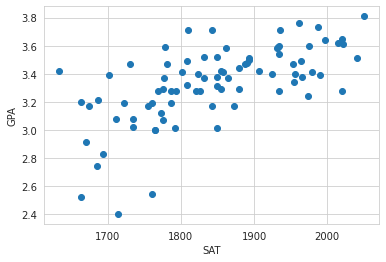

In [8]:
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [9]:
model = keras.Sequential([
                          keras.layers.Dense(10,activation='relu',input_shape=[1]),
                          keras.layers.Dense(10,activation='relu'),
                          keras.layers.Dense(10,activation='relu'),
                          keras.layers.Dense(1,activation='linear')
])

In [10]:
"""
model = keras.Sequential([
                          keras.layers.Dense(10,activation='relu',input_shape=[1], kernel_regularizer=keras.regularizers.L1(0.1)),
                          keras.layers.Dense(10,activation='relu'),
                          keras.layers.Dense(10,activation='relu'),
                          keras.layers.Dense(1,activation='linear')

            
])"""

"\nmodel = keras.Sequential([\n                          keras.layers.Dense(10,activation='relu',input_shape=[1], kernel_regularizer=keras.regularizers.L1(0.1)),\n                          keras.layers.Dense(10,activation='relu'),\n                          keras.layers.Dense(10,activation='relu'),\n                          keras.layers.Dense(1,activation='linear')\n\n            \n])"

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [12]:
#optimizer=tf.keras.optimizers.RMSprop(0.01)

In [13]:
#model.compile(loss='mean_squared_error', optimizer=optimizer)

In [14]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [32]:
model.fit(x,y,epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0729
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0730
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0729
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0730
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0729
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0729
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0731
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 13/100
3/3 [==============================] - 0s 5ms/

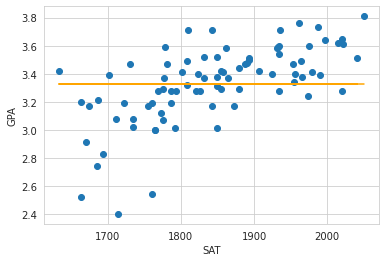

In [33]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color='orange')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [25]:
model.evaluate(x,y)

3/3 [==============================] - 0s 4ms/step - loss: 0.0729


0.07289765030145645

In [35]:
model.predict([1400])

array([[3.3293488]], dtype=float32)

In [27]:
model.predict([1500])

array([[3.3305423]], dtype=float32)